# Ueda's Oscillator
### Dow's final project for PHYS 250, Autumn 2024


This notebook will (at some point) be made interactive. For now, it is a series of code blocks which run computations and generate visualizations for the purposes of my poster.

### What I definitely want to cover
- postiion and phase space diagrams (ie time against position and time derivative against position, respectively)
    - good example [here](https://demonstrations.wolfram.com/DynamicalBehaviorOfADuffingOscillator/) and simple but nice one [here](https://demonstrations.wolfram.com/ForcedOscillatorWithDamping/)
- another good example of a short thing on the Duffing Oscillator [here](https://demonstrations.wolfram.com/DuffingOscillator/)
- Poincaré (first-return) sections
- bifurcation diagrams to analyze transition to chaos/sensitivity to initial conditions 
    - numerically compute lyapunov exponents



#### Maybe cover
- Hopf bifurcations
    - requires finding eigenevalues, so maybe pretty complicated
- animate a flow map
    

## Table of Contents
1. Introduction
2. The mathematical model
3. Numerically solving the differential equation
4. Position and phase diagrams. phase portraits could also be cool here, since they demonstrate sensitivity to inital conditions
5. Poincaré sections
6. Bifurcation diagrams
7. Hopf bifurcations
8. Flow map

### Introduction

We study the following differential equation: $$\ddot{x}+\delta\dot{x}+\alpha x^3=\gamma\cos (\omega t)$$  
where $\gamma$ is the amplitude of the driving force and $\omega$ is its angular frequency, $\delta\geq 0$ controls the damping, $\beta$ controls the nonlinearity of the driving force. We may rewrite the second order differential equation as a pair of first order equations $$\begin{cases}\dot{x_1}=x_2&\\
\dot{x_2}=-\delta x_2-\alpha x_1^3+\gamma\cos t\end{cases}$$ which will be useful for our numerical solver below.

**say what this models (kid on swing, bending steel bar, whatever** 

Following Ueda, we set $\omega=\alpha=1$, $\delta = 0.05$, and $\gamma = 7.5$. 


In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import RK45

In [34]:
#this block defines a function which numerically solves the ODE (via 4th order Runge-Kutta) 
# with an arbitrary set of parameters. by default, the parameters are set to Ueda's original (chaotic) parameters
#returns arrays of time values, displacement, velocities, and the last two at intervals of T for the Poincaré map
def solve_ueda(y0, t_start, t_end, max_step=0.1, delta=0.05, gamma=7.5, omega=1, alpha=1):
    #define the system of ODEs
    def ueda(t, y):
        x1, x2 = y 
        dx1_dt = x2
        dx2_dt = -delta * x2 - alpha * x1**3 + gamma * np.cos(omega * t)
        return [dx1_dt, dx2_dt]

    T = 2 * np.pi / omega                           #period of the driving force

    #introduce RK45 solver
    solver = RK45(ueda, t_start, y0, t_end, max_step=max_step)

    #lists to store results
    t_values, x1_values, x2_values, poincare_x1, poincare_x2 = [], [], [], [], []

    next_poincare_time = T                           #initialize time for next Poincaré map

    #integrate
    while solver.status == "running":
        solver.step()
        t_values.append(solver.t)
        x1_values.append(solver.y[0])
        x2_values.append(solver.y[1])

        #record Poincaré map data
        if solver.t >= next_poincare_time:
            poincare_x1.append(solver.y[0])
            poincare_x2.append(solver.y[1])
            next_poincare_time += T

    return t_values, x1_values, x2_values, poincare_x1, poincare_x2

In [51]:
#this block defines a function which plots the results of the above simulation
#i.e. it plots position, phase, and poincaré map plots
def plot_ueda(t_values, x1_values, x2_values, poincare_x1, poincare_x2, title_suffix=""):
    plt.figure(figsize=(14, 8))

    #displacement vs. time
    plt.subplot(3, 1, 1)
    plt.plot(t_values, x1_values, label="Displacement (x1)", color="blue")
    plt.xlim(0, 100)
    plt.xlabel("Time (t)")
    plt.ylabel("Displacement (x1)")
    plt.title(f"Ueda's Oscillator - Time Domain {title_suffix}")
    plt.grid()
    plt.legend()

    #phase plot (velocity vs. displacement)
    plt.subplot(3, 1, 2)
    plt.plot(x1_values[8000:9000], x2_values[8000:9000], label="Phase Space (x2 vs x1)", color="orange")
    plt.xlabel("Displacement (x1)")
    plt.ylabel("Velocity (x2)")
    plt.title(f"Ueda's Oscillator - Phase Space {title_suffix}")
    plt.grid()
    plt.legend()

    #plot Poincaré map
    plt.subplot(3, 1, 3)
    plt.scatter(poincare_x1, poincare_x2, color="green", s=10, label="Poincaré Section")
    plt.xlabel("Displacement (x1)")
    plt.ylabel("Velocity (x2)")
    plt.title(f"Ueda's Oscillator - Poincaré Section {title_suffix}")
    plt.grid()
    plt.legend()

    plt.tight_layout()
    plt.show()

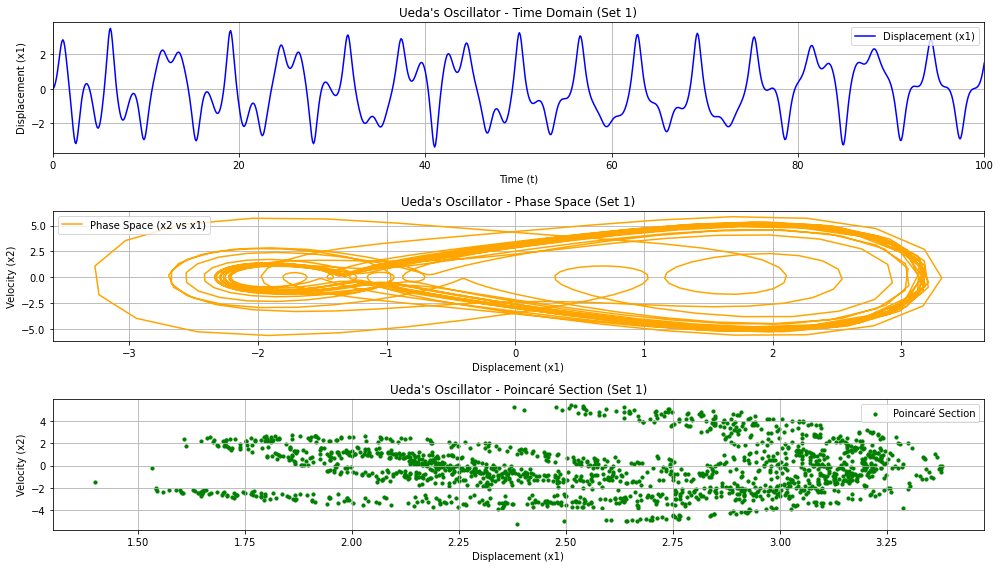

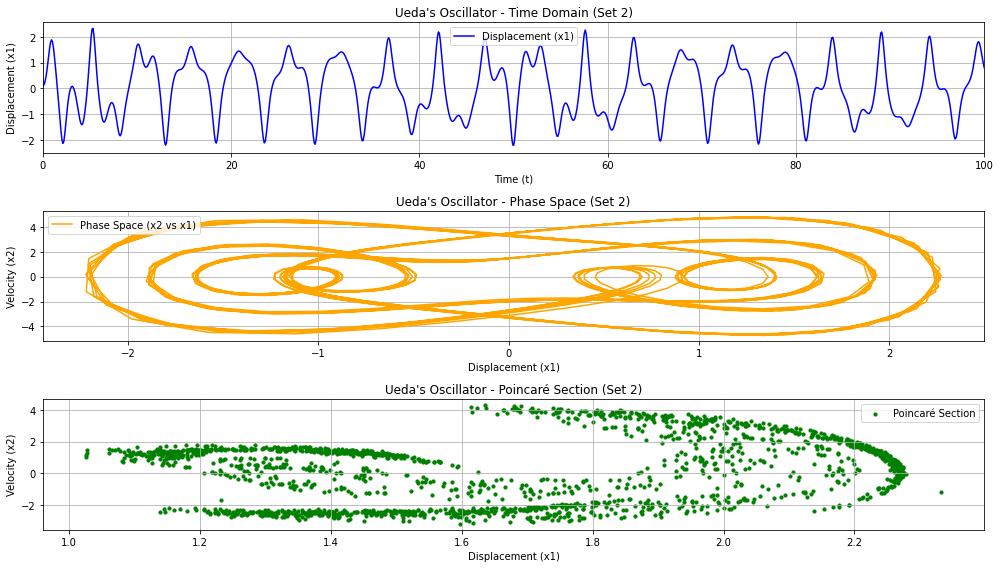

In [53]:
params1 = {"y0": [0.0, 0.0], "t_start": 0.0, "t_end": 10000.0}
t1, x1_1, x2_1, p_x1_1, p_x2_1 = solve_ueda(**params1)
plot_ueda(t1, x1_1, x2_1, p_x1_1, p_x2_1, title_suffix="(Set 1)")

    
params2 = {"y0": [0.1, 0.0], "t_start": 0.0, "t_end": 10000.0, "max_step":0.1, "delta": 0.1, "gamma": 7.0, "omega": 1.2, "alpha": 3}
t2, x1_2, x2_2, p_x1_2, p_x2_2 = solve_ueda(**params2)
plot_ueda(t2, x1_2, x2_2, p_x1_2, p_x2_2, title_suffix="(Set 2)")